Imports

In [1]:
import pandas as pd
import sys
import os


Add the scripts directory to the Python path

In [2]:
scripts_path = "../scripts"
sys.path.append(scripts_path)

In [3]:
# Import all our custom functions
import passenger_flow_utils as pfu

# Configure pandas display options
pd.set_option('display.max_rows', 100)

In [4]:
import os
print(os.listdir(scripts_path))

['passenger_flow_utils.py', '__init__.py', '__pycache__']


In [6]:
# --- Main Configuration ---
# Change these variables to run the analysis on a different line
FILE_PATH = '../data/EW-Passenger flow-station-hour.csv'
LINE_PREFIX = 'EW'
LINE_NAME = 'East-West Line'

In [7]:
# Load and prepare the data using our utility function
df_ew = pfu.load_and_prepare_data(FILE_PATH, LINE_PREFIX)

# Perform basic checks
pfu.basic_checks(df_ew)

--- Shape ---
(16, 15)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  16 non-null     object
 1   EW1      16 non-null     int64 
 2   EW2      16 non-null     int64 
 3   EW3      16 non-null     int64 
 4   EW4      16 non-null     int64 
 5   EW8      16 non-null     int64 
 6   EW9      16 non-null     int64 
 7   EW10     16 non-null     int64 
 8   EW13     16 non-null     int64 
 9   EW14     16 non-null     int64 
 10  EW18     16 non-null     int64 
 11  EW19     16 non-null     int64 
 12  EW20     16 non-null     int64 
 13  EW21     16 non-null     int64 
 14  EW22     16 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.0+ KB

--- Null Values ---
Station    0
EW1        0
EW2        0
EW3        0
EW4        0
EW8        0
EW9        0
EW10       0
EW13       0
EW14       0
EW18       0
EW19       0
EW2

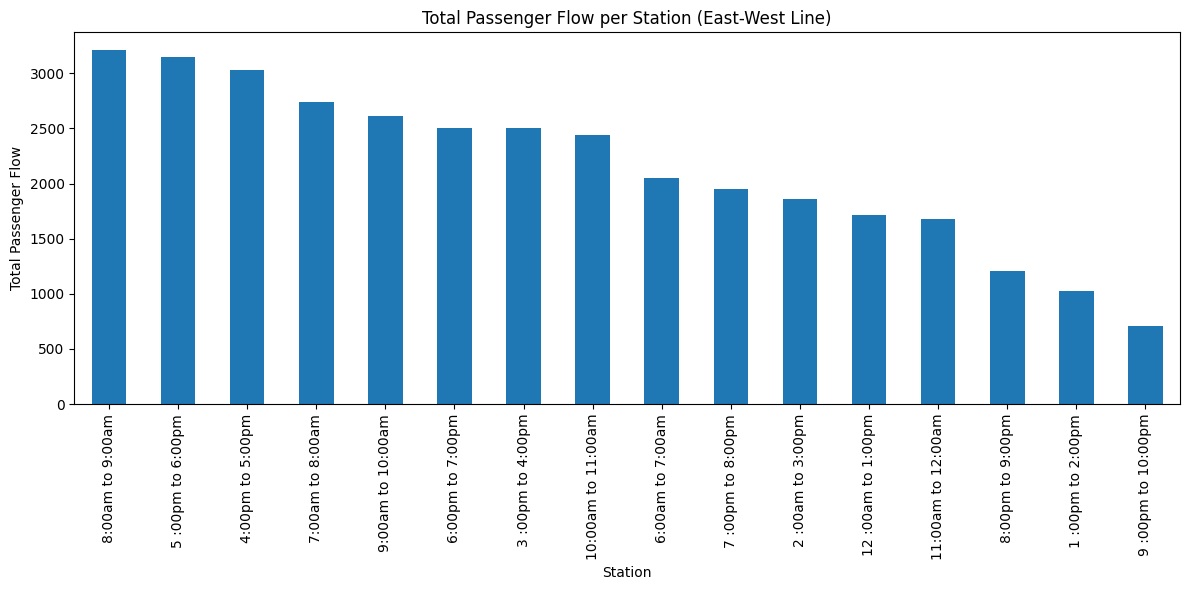

In [8]:
# Add the 'TotalFlow' column for analysis
df_ew = pfu.add_total_flow(df_ew)

# Plot the total flow
pfu.plot_total_flow_per_station(
    df_ew,
    title=f'Total Passenger Flow per Station ({LINE_NAME})'
)

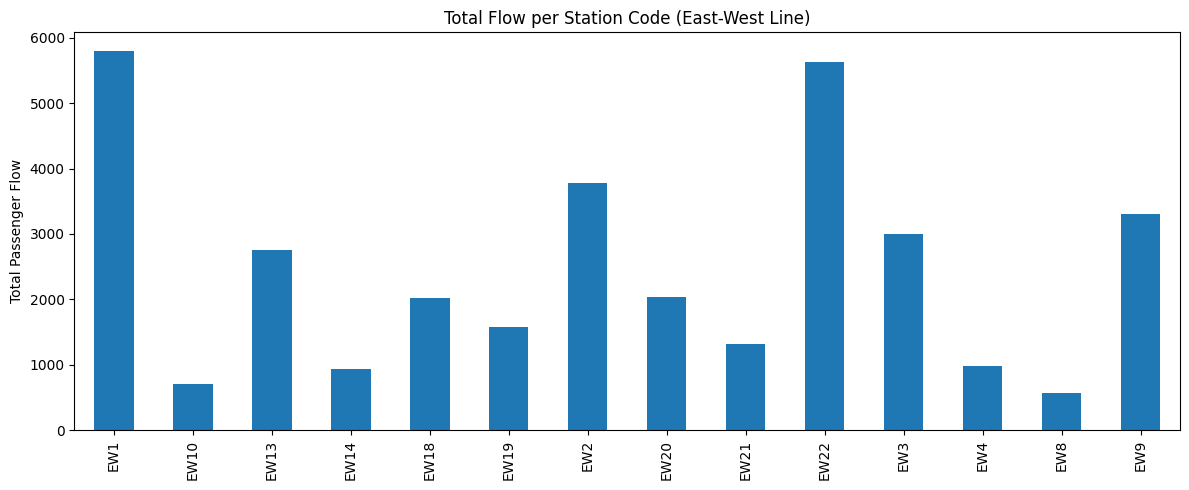

In [9]:
pfu.plot_flow_by_column(
    df_ew,
    title=f'Total Flow per Station Code ({LINE_NAME})'
)

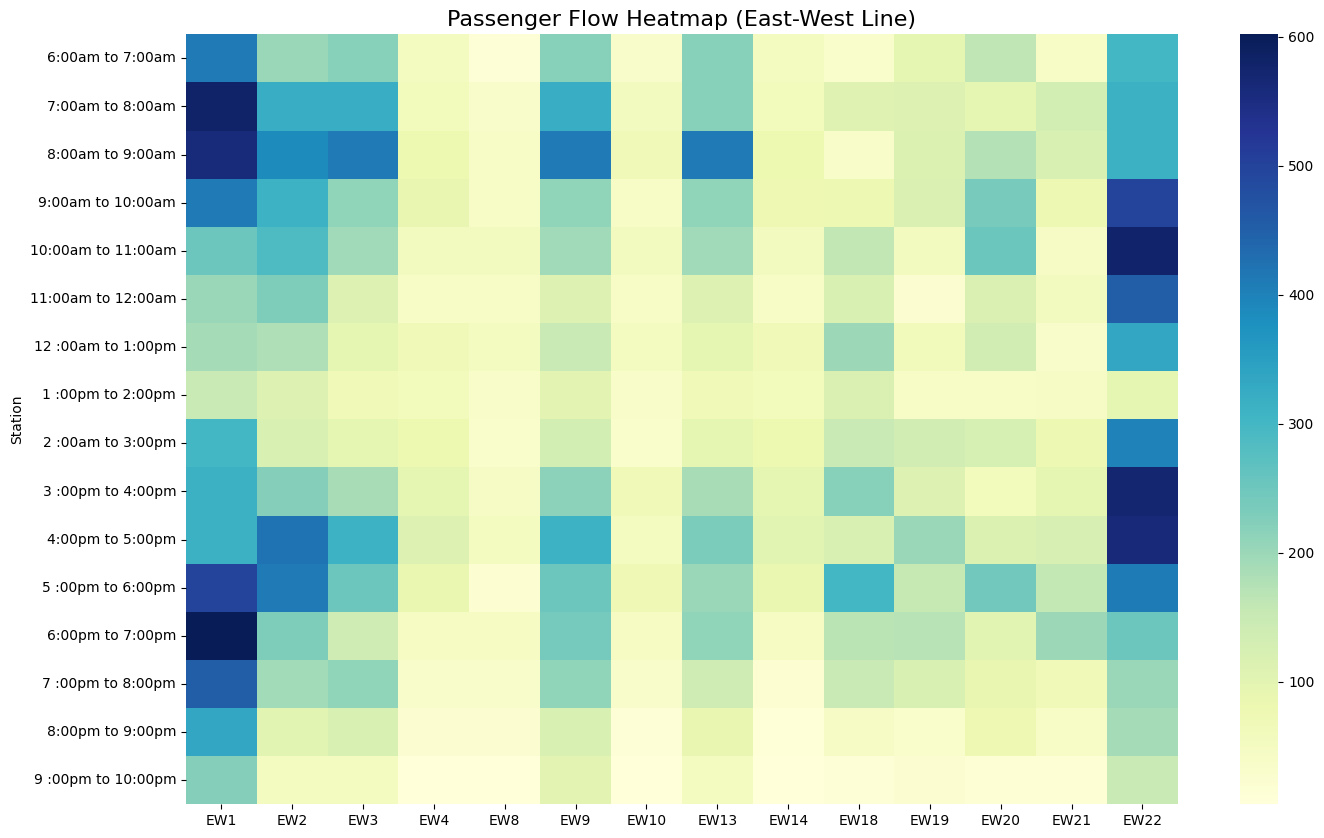

In [10]:
pfu.plot_flow_heatmap(
    df_ew,
    title=f'Passenger Flow Heatmap ({LINE_NAME})'
)

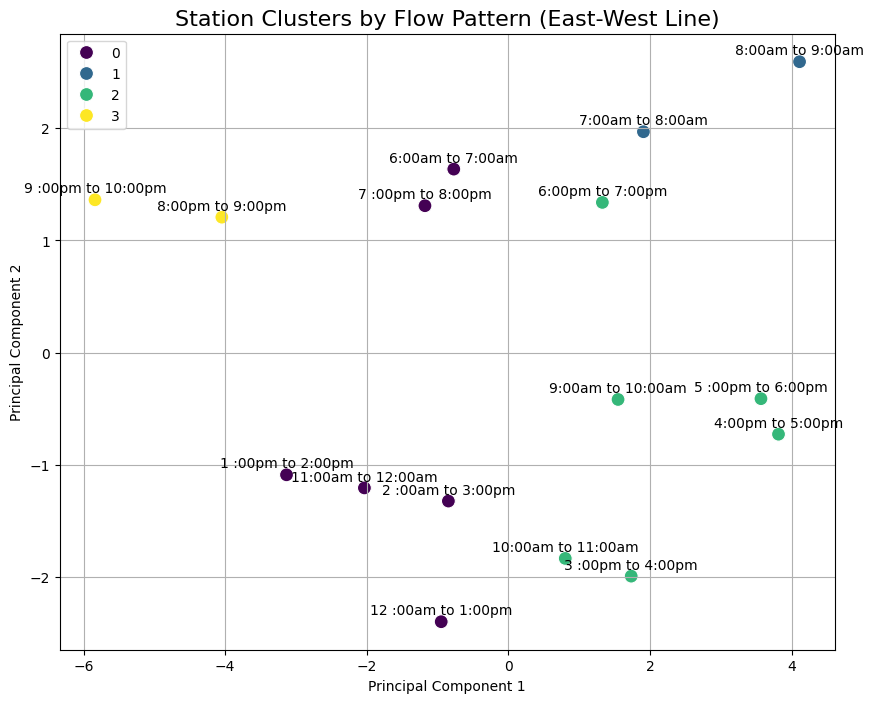

In [11]:
pfu.plot_station_clusters(
    df_ew,
    n_clusters=4, # You can experiment with this number
    title=f'Station Clusters by Flow Pattern ({LINE_NAME})'
)

In [12]:
top_stations, bottom_stations = pfu.get_top_bottom_stations(df_ew, n=5)

print(f"--- Top 5 Busiest Stations ({LINE_NAME}) ---")
display(top_stations)

print(f"\n--- Top 5 Least Busy Stations ({LINE_NAME}) ---")
display(bottom_stations)

--- Top 5 Busiest Stations (East-West Line) ---


,Station,TotalFlow
2,8:00am to 9:00am,3211
11,5 :00pm to 6:00pm,3150
10,4:00pm to 5:00pm,3030
1,7:00am to 8:00am,2736
3,9:00am to 10:00am,2613



--- Top 5 Least Busy Stations (East-West Line) ---


,Station,TotalFlow
6,12 :00am to 1:00pm,1719
5,11:00am to 12:00am,1680
14,8:00pm to 9:00pm,1211
7,1 :00pm to 2:00pm,1028
15,9 :00pm to 10:00pm,712


In [13]:
summary_table = pfu.create_summary_table(df_ew)

print(f"--- Full Summary Table ({LINE_NAME}) ---")
display(summary_table)

--- Full Summary Table (East-West Line) ---


,Station,Total Flow,Busiest Code,Least Used Code
0,8:00am to 9:00am,3211,EW1,EW18
1,5 :00pm to 6:00pm,3150,EW1,EW8
2,4:00pm to 5:00pm,3030,EW22,EW8
3,7:00am to 8:00am,2736,EW1,EW8
4,9:00am to 10:00am,2613,EW22,EW8
5,6:00pm to 7:00pm,2508,EW1,EW4
6,3 :00pm to 4:00pm,2501,EW22,EW8
7,10:00am to 11:00am,2442,EW22,EW21
8,6:00am to 7:00am,2055,EW1,EW8
9,7 :00pm to 8:00pm,1955,EW1,EW14
